In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

In [5]:
online = pd.read_excel(r'Online Retail.xlsx')

In [6]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
print('min:{};max:{}'.format(min(online.InvoiceDate),max(online.InvoiceDate)))

min:2010-12-01 08:26:00;max:2011-12-09 12:50:00


In [26]:
def get_date_int(df,column): 
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [13]:
def get_month(x): return dt.datetime(x.year,x.month,1) #datetime.datetime

In [16]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

In [17]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [18]:
grouping = online.groupby('CustomerID')['InvoiceMonth'] #invoices per customer

In [20]:
online['CohortMonth']=grouping.transform('min') # min coz thats the first time customer bought stuff from me

In [21]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [27]:
#time offset values
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online,'CohortMonth')

In [28]:
#differernce
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [29]:
online['CohortIndex'] = year_diff*12 + month_diff + 1

In [31]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5.0


In [32]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [33]:
cohort_data = cohort_data.reset_index()

In [34]:
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

In [37]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Retention Rate
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0)

In [43]:
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


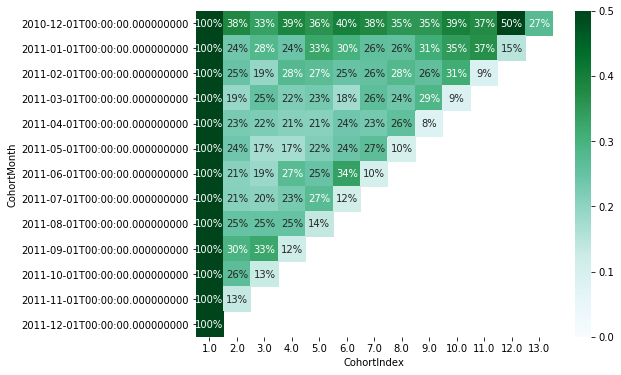

In [47]:
#Cohort Visualization
plt.figure(figsize=(8,6))
sns.heatmap(data=retention,annot=True, fmt='.0%', vmin=0.0,vmax=0.5, cmap='BuGn')

In [48]:
#Recency, Frequency, Monetary
online['TotSum']=online['UnitPrice']*online['Quantity']

In [49]:
def get_date(x): return dt.datetime(x.year,x.month,x.day)

In [50]:
online['InvoiceDate2'] = online['InvoiceDate'].apply(get_date)

In [52]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotSum,InvoiceDate2
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0,16.60,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5.0,14.85,2011-12-09


In [54]:
 snapshot_date = max(online.InvoiceDate2) + dt.timedelta(days=1) #we need to look at recency from the snapshot date

In [55]:
snapshot_date

Timestamp('2011-12-10 00:00:00')

In [60]:
#Aggregate data at customer level
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate2': lambda x : (snapshot_date - max(x)).days,
    'InvoiceNo' : 'count',
    'TotSum' : 'sum'
})

In [85]:
datamart

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,GeneralSegment
CustomerID,,,,,,,,,
12346.0,326,2,0.000000e+00,1,1,1,111,3.0,Bronze
12347.0,3,182,4.310000e+03,4,4,4,444,12.0,Gold
12348.0,76,31,1.797240e+03,2,2,4,224,8.0,Silver
12349.0,19,73,1.757550e+03,3,3,4,334,10.0,Gold
12350.0,311,17,3.344000e+02,1,1,2,112,4.0,Bronze
12352.0,37,95,1.545410e+03,3,3,3,333,9.0,Gold
12353.0,205,4,8.900000e+01,1,1,1,111,3.0,Bronze
12354.0,233,58,1.079400e+03,1,3,3,133,7.0,Silver
12355.0,215,13,4.594000e+02,1,1,2,112,4.0,Bronze


In [64]:
datamart.rename(columns={
    'InvoiceDate2':'Recency',
    'InvoiceNo':'Frequency',
    'TotSum':'Monetary'}, inplace=True
)

In [65]:
datamart

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.000000e+00
12347.0,3,182,4.310000e+03
12348.0,76,31,1.797240e+03
12349.0,19,73,1.757550e+03
12350.0,311,17,3.344000e+02
12352.0,37,95,1.545410e+03
12353.0,205,4,8.900000e+01
12354.0,233,58,1.079400e+03
12355.0,215,13,4.594000e+02


In [67]:
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['Recency'],4,labels=r_labels)

In [68]:
datamart = datamart.assign(R=r_quartiles.values)

In [70]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'],4,labels=f_labels)
m_quartiles = pd.qcut(datamart['Monetary'],4,labels=m_labels)
datamart = datamart.assign(F=f_quartiles.values,M=m_quartiles.values)

In [71]:
datamart

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.000000e+00,1,1,1
12347.0,3,182,4.310000e+03,4,4,4
12348.0,76,31,1.797240e+03,2,2,4
12349.0,19,73,1.757550e+03,3,3,4
12350.0,311,17,3.344000e+02,1,1,2
12352.0,37,95,1.545410e+03,3,3,3
12353.0,205,4,8.900000e+01,1,1,1
12354.0,233,58,1.079400e+03,1,3,3
12355.0,215,13,4.594000e+02,1,1,2


In [72]:
#Concat the values and sum the concatenated to form RFM_Score
def join_rfm(x): return str(x['R'])+str(x['F'])+str(x['M'])
datamart['RFM_Segment']= datamart.apply(join_rfm,axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [73]:
datamart.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0
12347.0,3,182,4310.00,4,4,4,444,12.0
12348.0,76,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,311,17,334.40,1,1,2,112,4.0


In [78]:
datamart.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         265.6       7.8    109.1   391
4.0         175.6      13.9    227.0   390
5.0         152.7      21.1    343.8   520
6.0          95.1      28.6    491.7   466
7.0          79.5      39.5    725.4   447
8.0          63.0      57.1    972.3   466
9.0          44.7      78.8   1361.9   418
10.0         32.0     115.3   1897.6   437
11.0         21.1     199.9   3993.5   379
12.0          6.9     372.7   8889.8   458

In [80]:
#Customers to Gold, Bronze, Silver
def segment_me(df):
    if df['RFM_Score']>= 9:
        return 'Gold'
    elif (df['RFM_Score']>=5) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [82]:
datamart['GeneralSegment'] = datamart.apply(segment_me, axis=1)

In [83]:
datamart.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,GeneralSegment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0,Bronze
12347.0,3,182,4310.00,4,4,4,444,12.0,Gold
12348.0,76,31,1797.24,2,2,4,224,8.0,Silver
12349.0,19,73,1757.55,3,3,4,334,10.0,Gold
12350.0,311,17,334.40,1,1,2,112,4.0,Bronze


In [84]:
datamart.groupby('GeneralSegment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                  mean      mean     mean count
GeneralSegment                                 
Bronze           220.7      10.9    168.0   781
Gold              25.9     194.9   4127.4  1692
Silver            99.3      36.1    624.1  1899

In [163]:
##KMeans Clustering
#Data pre-processing for clustering
datamart_rfm = datamart.iloc[:,0:3]
datamart_rfm['Monetary']=datamart_rfm['Monetary'].astype(int)

In [164]:
datamart_rfm['Monetary'] = np.where(datamart_rfm['Monetary']< 0, 0,datamart_rfm['Monetary'])

print(datamart_rfm)

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2         0
12347.0           3        182      4309
12348.0          76         31      1797
12349.0          19         73      1757
12350.0         311         17       334
12352.0          37         95      1545
12353.0         205          4        89
12354.0         233         58      1079
12355.0         215         13       459
12356.0          23         59      2811
12357.0          34        131      6207
12358.0           2         19      1168
12359.0           8        254      6245
12360.0          53        129      2662
12361.0         288         10       189
12362.0           4        274      5154
12363.0         110         23       552
12364.0           8         85      1313
12365.0         292         23       320
12367.0           5         11       168
12370.0          52        167      3545
12371.0          45         63      1887
12372.0         

In [165]:
datamart_rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0
12347.0,3,182,4309
12348.0,76,31,1797
12349.0,19,73,1757
12350.0,311,17,334
12352.0,37,95,1545
12353.0,205,4,89
12354.0,233,58,1079
12355.0,215,13,459


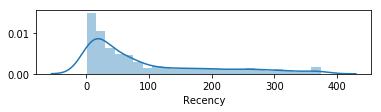

In [93]:
plt.subplot(3,1,1); sns.distplot(datamart_rfm['Recency'])

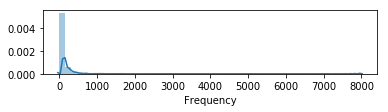

In [94]:
plt.subplot(3,1,2); sns.distplot(datamart_rfm['Frequency'])

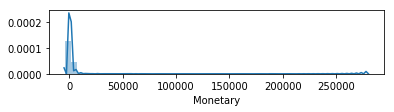

In [95]:
plt.subplot(3,1,3); sns.distplot(datamart_rfm['Monetary'])

In [166]:
np.seterr(divide = 'ignore') 
datamart_log['Recency'] = np.where(datamart_rfm['Recency']>0, np.log(datamart_rfm['Recency']), 0)
datamart_log['Frequency'] = np.where(datamart_rfm['Frequency']>0, np.log(datamart_rfm['Frequency']), 0)
datamart_log['Monetary'] = np.where(datamart_rfm['Monetary']>0, np.log(datamart_rfm['Monetary']), 0)

C:\Users\preet\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


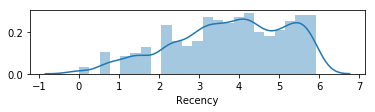

In [169]:
plt.subplot(3,1,1); sns.distplot(datamart_log['Recency'])

In [115]:
#Unskew the data with log transformations when data is positive only
#Normalize the data 

In [167]:
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized= scaler.transform(datamart_log)

In [168]:
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

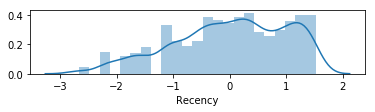

In [170]:
plt.subplot(3,1,1); sns.distplot(datamart_normalized['Recency'])

In [172]:
#Kmeans
#Elbow plot
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_
    

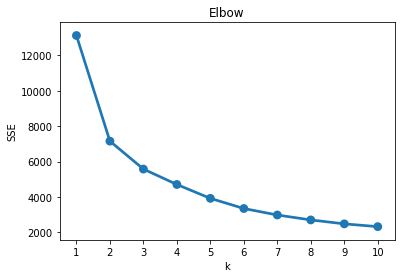

In [174]:
#Plot the elbow plot
plt.title('Elbow')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

In [175]:
#kmeans
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_

In [176]:
datamart_rfm2 = datamart_rfm.assign(Cluster = cluster_labels)

In [177]:
datamart_rfm2

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,2,0,0
12347.0,3,182,4309,1
12348.0,76,31,1797,0
12349.0,19,73,1757,1
12350.0,311,17,334,0
12352.0,37,95,1545,1
12353.0,205,4,89,0
12354.0,233,58,1079,0
12355.0,215,13,459,0


In [183]:
letscolor = datamart_rfm2.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'
})

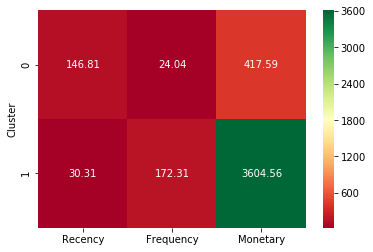

In [187]:
sns.heatmap(letscolor, annot=True, fmt='.2f',cmap='RdYlGn')